# Network Creation

Let's create a small Neural Network with 3 hidden layers for testing

In [1]:
import numpy as np
import pandas as pd
from NeuralNetwork import *
from utils import *
import warnings
# to ignore pandas warning
warnings.simplefilter(action='ignore', category=FutureWarning)

end Training
MSE: mean = 145.57727112158642, Var = 0.0


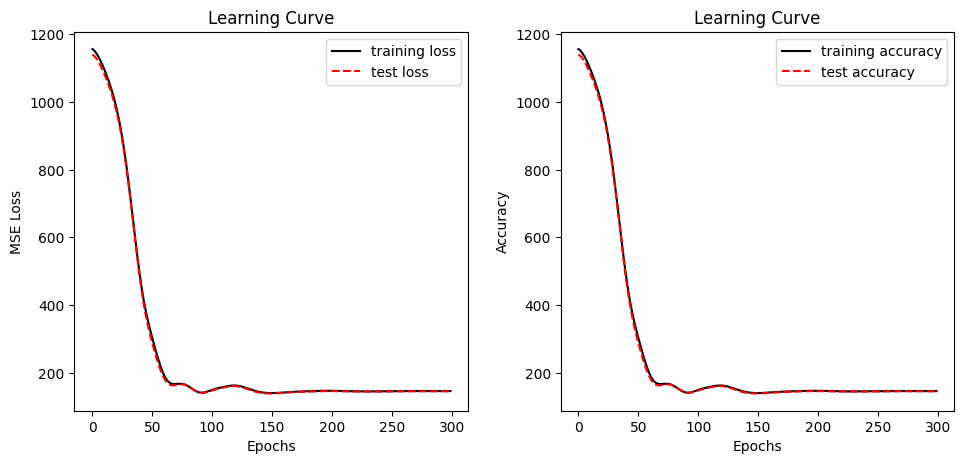

([1139.914377497922,
  1137.5690950800738,
  1134.1918969972094,
  1129.8838754408462,
  1124.7498472114914,
  1118.9100425727017,
  1112.4640365401672,
  1105.5176364507847,
  1098.1380283542728,
  1090.3801048483997,
  1082.2525871604312,
  1073.785906059399,
  1064.9615753610537,
  1055.7453071777452,
  1046.0881866077516,
  1035.916449690583,
  1025.1484302445815,
  1013.7144943019307,
  1001.5175078587905,
  988.4420160737182,
  974.3899094589661,
  959.2691705307989,
  942.9826774217382,
  925.4342480215574,
  906.5448119447418,
  886.2599974300989,
  864.5368464134152,
  841.3750663233758,
  816.802584284148,
  790.8650729322466,
  763.6637620669998,
  735.3376616137062,
  706.0679111283575,
  676.0619418132571,
  645.5963242207108,
  614.9839139347923,
  584.5413252331247,
  554.5947942033346,
  525.4749099722425,
  497.4816183258732,
  470.8706040729812,
  445.8453253049005,
  422.53700139968714,
  400.9773855150913,
  381.12751435898434,
  362.8586012481306,
  345.99015153173

In [4]:
col_names = ('Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6',
             'Input7', 'Input8', 'Input9', 'Input10', 'TARGET_x', 'TARGET_y', 'TARGET_z')
data = pd.read_csv("../ML-23-PRJ-Package/ML-CUP23-TR.csv",
                   skiprows=7, usecols=[i for i in range(1, 14)], names=col_names)

data = data.sample(frac=1)
#SPLIT 80/20 FOR TRAIN/TEST
folds = np.array_split(data, 5)
tr_data = pd.concat(folds[1:])
test_data = folds[0]

epochs=300
params={
    "eta" : 0.0002,
    "mb" : 800,
    "momentum" : 0.95,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "relu",
    "out_act_fun" : "linear",
    "cost_fun" : "mse",
    "ridge_lambda": 0.001,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

n=1
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    net = NeuralNetwork()

    n_inputs = tr_data.shape[1] - 3

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 50)

    net.add_output_layer(50, 3)
    test_error,training_error,acc_test,acc_train=net.train(tr_data,params,test_data=test_data, outFun2="mse")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train

print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
#print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, std = {np.std(acc_test_errors[:,-1])}")
fig,axs = plt.subplots(1,2,figsize=(10,5))

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()

test_error,training_error,acc_test,acc_train
